# Preamble

To use apecemathpy we can consider two ways, symbolic and numeric definitions of Higgs couplings. To do symbolic calculations we should use [sympy](https://www.sympy.org/en/index.html) library, for example we can use any funtion from sympy using the next one lines of commands:

In [72]:
import sympy as sp #import sympy
sp.init_printing() # pretty latex printer activation
sp.sqrt(4)

where we have used square root function of sympy library. Also we can work with symbolic variables with

In [73]:
xsym = sp.symbols('x')
sp.sqrt(xsym)

To numeric function we choose [numpy](https://numpy.org/) library, then, we can use square root of numpy library as follow

In [74]:
import numpy as np #import numpy
np.sqrt(4.0)

the main advantage of numpy is that work in a vectorial way, 

In [75]:
xnp = np.array([4.0,9.0,16.0])
np.sqrt(xnp)

array([2., 3., 4.])

in the example above the square root have been calculated over each component of `xnp` `np.array`. In principle, to work with spacemathpy we only need define a numeric version of our Higgs couplings, but if we can see our expressions is convenient to also define the symbolic version. To define both kinds of function, we do use `issymbolic` function defined in spacemathpy, which return `True` if someone of its arguments are sympy symbols(instances of `sp.symbols` function) or `False` otherwise. The next one is a example of this approach

In [76]:
from spacemathpy import * #import all functions of spacemathpy

In [77]:
def square_root(x):
    if issymbolic(x):
        return sp.sqrt(x)
    else:
        return np.sqrt(x)


The above function works well with numeric and symbolic approaches, for example

In [78]:
square_root(xsym)

In [79]:
square_root(xnp)

array([2., 3., 4.])

As final comment, spacemathpy have some global variables predefined, for example masses to $t$,$b$, $\tau$, $W$ and $Z$ particles are defined as a python dictionary as we can see in the next example

In [80]:
mW

{'value': 80.379, 'units': 'GeV', 'symbol': m_W}

so, if we need a numeric value we use

In [81]:
mW['value']

for symbolic representation we use

In [82]:
mW['symbol']

Also, constants like $g$ and $v$ (SM vev) are given by `g` and `SMvev` as we see above

In [83]:
g

{'value': 0.6534878048780488, 'unit': None, 'symbol': g}

In [84]:
SMvev

{'value': 246, 'units': 'GeV', 'symbol': v}

For a correct implementation of Higgs couplings we need use the predifined masses and constants.

# 2HDM

## Higgs couplings with fermions
In the context of 2HDM-III, the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ can be extracted of:

$$\mathcal{L}_Y^{hqq} = \frac{g}{2}\left(\frac{m_{d_{m}}}{m_{W}}\right) d_{m}\left[-\frac{\operatorname{sen} \alpha}{\cos \beta} \delta_{m n}+\frac{\sqrt{2} \cos (\alpha-\beta)}{g \cos \beta}\left(\frac{m_{W}}{m_{d_{m}}}\right)\left(\tilde{Y}_{2}^{d}\right)_{m n}\right] d_{n} h^{0}$$
$$+\frac{g}{2}\left(\frac{m_{u_{m}}}{m_{W}}\right) \bar{u}_{m}\left[\frac{\cos \alpha}{\operatorname{sen} \beta} \delta_{m n}-\frac{\sqrt{2} \cos (\alpha-\beta)}{g \operatorname{sen} \beta}\left(\frac{m_{W}}{m_{u_{m}}}\right)\left(\bar{Y}_{1}^{u}\right)_{m n}\right] u_{n} h^{0}$$

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

In [85]:
#2HDM-III
def ghtt_2hdm(α,Att,Cab,tb):
    global mW,mt,g,SMvev
    if issymbolic(α,Att,Cab,tb):
        MW,Mt= mW['symbol'],mt['symbol']
        return (g['symbol']/2)*(Mt/MW)*(-sp.cos(α)/tb*sp.cos(sp.atan(tb)) + 
                sp.sqrt(2)*Cab/(g['symbol']*tb*sp.cos(sp.atan(tb)))*(MW/Mt)*(
                    Mt/SMvev['symbol'])*Att)
    else:
        MW,Mt= mW['value'],mt['value']
        return (g['value']/2)*(Mt/MW)*(-np.cos(α)/tb*np.cos(np.arctan(tb)) + 
                np.sqrt(2)*Cab/(g['value']*tb*np.cos(np.arctan(tb)))*(MW/Mt)*(
                    Mt/SMvev['value'])*Att)

symbolic definition of variables

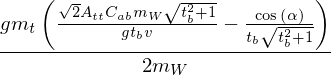

In [86]:
a,Att,Cab,tb = sp.symbols('alpha,A_{tt},C_{ab},t_b')
ghtt_2hdm(a,Att,Cab,tb)

numeric evaluation

In [87]:
ghtt_2hdm(0.1,0.2,0.3,0.4)

In [88]:
def ghbb_2hdm(α,Abb,Cab,tb):
    global mW,mb,g,SMvev
    if issymbolic(α,Abb,Cab,tb):
        MW,Mb= mW['symbol'],mb['symbol']
        return (g['symbol']/2)*(Mb/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mb)*(
                    Mb/SMvev['symbol'])*Abb)
    else:
        MW,Mb= mW['value'],mb['value']
        return (g['value']/2)*(Mb/MW)*(-np.sin(α)*tb/np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mb)*(
                    Mb/SMvev['value'])*Abb)

symbolic evaluation

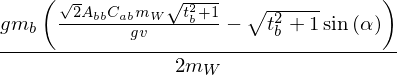

In [89]:
Abb = sp.symbols('A_bb')    
ghbb_2hdm(a,Abb,Cab,tb)

numeric evaluation

In [90]:
ghbb_2hdm(0.1,0.2,0.3,0.4)

In [91]:
def ghtautau_2hdm(α,Atata,Cab,tb):
    global mW,mta,g,SMvev
    if issymbolic(α,Atata,Cab,tb):
        MW,Mtau= mW['symbol'],mta['symbol']
        return (g['symbol']/2)*(Mtau/MW)*(-sp.sin(α)*tb/sp.sin(sp.atan(tb)) + 
                sp.sqrt(2)*(Cab*tb)/(g['symbol']*sp.sin(sp.atan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['symbol'])*Atata)
    else:
        MW,Mtau= mW['value'],mta['value']
        return (g['value']/2)*(Mtau/MW)*(-np.sin(α)/tb*np.sin(np.arctan(tb)) + 
                np.sqrt(2)*(Cab*tb)/(g['value']*np.sin(np.arctan(tb)))*(MW/Mtau)*(
                    Mtau/SMvev['value'])*Atata)

Atata = sp.symbols(r'A_{\tau\tau}')    
ghtautau_2hdm(a,Atata,Cab,tb)
ghtautau_2hdm(0.1,0.2,0.3,0.4)

## Higgs couplings with vector bosons
In the case of $g_{hWW}$ and $g_{hZZ}$ the couplings in the $2HDM$ are given by

$$\mathcal{L}_{hVV} = g m_{V} \sin{(\alpha - \beta)}$$ 

where $V = W,Z$. The corresponding functions in python are given as follow

In [92]:
def ghww_2hdm(sab):
    global mW,g
    if issymbolic(sab):
        MW,gg= mW['symbol'],g['symbol']
        return gg*MW*sab
    else:
        MW,gg= mW['value'],g['value']
        return gg*MW*sab

sab = sp.symbols('s_{ab}',real=True)
ghww_2hdm(sab)
ghww_2hdm(0.1)

In [93]:
def ghzz_2hdm(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,gg= mZ['symbol'],g['symbol']
        return gg*MZ*sab
    else:
        MZ,gg= mZ['value'],g['value']
        return gg*MZ*sab

#sab = sp.symbols('s_{ab}',real=True)
ghzz_2hdm(sab)
ghzz_2hdm(0.1)

## Initial parameter space

In [94]:
n = 100000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,1.0,n)
Att = np.random.uniform(0.0,1.0,n)
Abb = np.random.uniform(0.0,1.0,n)
mCH = np.random.uniform(200,1000,n)
parameters = {'Cab':Cab,'tb':tb,'Att':Att,'Abb':Abb}

## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [95]:
data_rtau = Rtau.parameter_space_pandas([
         ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghtautau_2hdm(np.arccos(Cab) + np.arctan(tb),1,Cab,tb)
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:41: RuntimeWarning: invalid value encountered in sqrt
  return -(1/4)*(np.log((1+np.sqrt(1-(((mS**2)/(4*mtop**2))**-1)))/(1-np.sqrt(1-(((mS**2)/(4*mtop**2))**-1))))*(-sp.I*np.pi))**2


In [96]:
data_rtau['1s']

,Cab,tb,Att,Abb,Rtau
0,-0.833431,0.331863,0.788953,0.828200,1.217475
1,-0.401037,0.556191,0.141645,0.230806,0.970277
2,-0.037819,0.199392,0.381439,0.231048,1.114461
3,-0.760486,0.274383,0.999310,0.833285,1.205492
4,0.683302,0.053215,0.888559,0.590365,1.240041
5,-0.345589,0.533391,0.055469,0.012012,1.060126
6,-0.411977,0.314112,0.937760,0.340169,1.241354
7,-0.477099,0.400406,0.680326,0.748570,1.212298
8,-0.499318,0.501176,0.480218,0.301774,0.946537
9,-0.160270,0.410246,0.106440,0.787007,1.064207


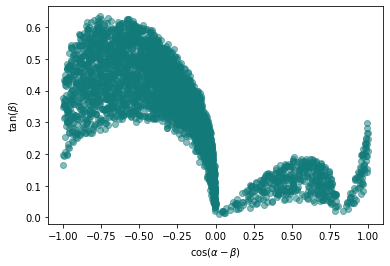

In [97]:
latex_names = {'Cab':r'$\cos(\alpha -\beta)$',
        'tb':r'$\tan(\beta)$',
        'Att':r'$A_{tt}$','Abb':r'$A_{bb}$','Rtau':r'$R_{\tau}$',
        'Rb':r'$R_b$',
        'Rgamma':r'$R_{\gamma}$',
        'Rw':r'$R_{W}$',
        'Rz':r'$R_{Z}$'}
plot_df(data_rtau['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

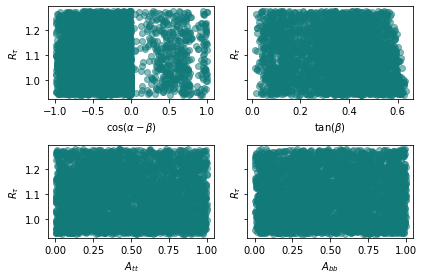

In [98]:
plot_tabledf(data_rtau['1s'],Rtau.latex_name,
             latex_names=latex_names)

### $$R_{b}$$

In [99]:
data_rb= Rb.parameter_space_pandas([
         ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb)
],parameters)

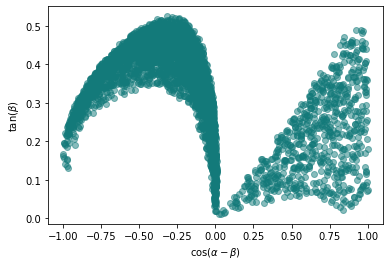

In [100]:
plot_df(data_rb['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

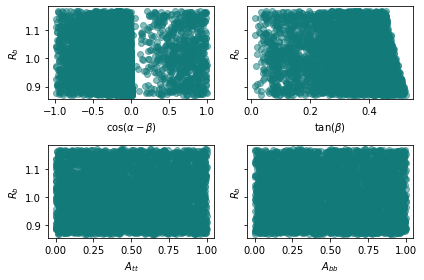

In [101]:
plot_tabledf(data_rb['1s'],Rb.latex_name,
             latex_names=latex_names)

### $$R_{\gamma}$$

In [102]:
data_rga = Rgamma.parameter_space_pandas([
         ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghww_2hdm(np.sqrt(1-Cab**2)),0,mCH
],parameters)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:165: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4)*(np.log((1+np.sqrt(1-(((mS**2)/(4*mWp**2))**-1)))/(1-np.sqrt(1-(((mS**2)/(4*mWp**2))**-1))))*(-sp.I*np.pi))**2;
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:209: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4)*(np.log((1+np.sqrt(1-(((mS**2)/(4*mCH**2))**-1)))/(1-np.sqrt(1-(((mS**2)/(4*mCH**2))**-1))))*(- sp.I*np.pi))**2


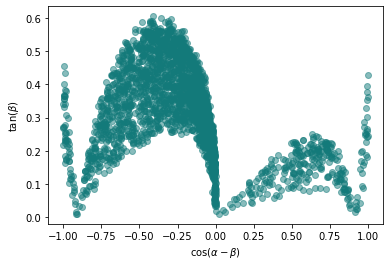

In [103]:
plot_df(data_rga['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

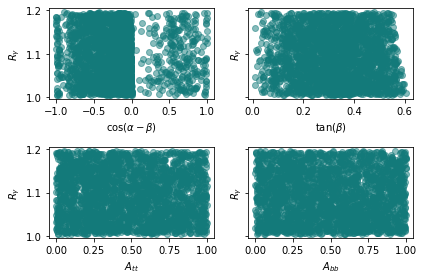

In [104]:
plot_tabledf(data_rga['1s'],Rgamma.latex_name,
             latex_names=latex_names)

### $$R_{W}$$

In [105]:
data_rw = Rw.parameter_space_pandas([
         ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghww_2hdm(np.sqrt(1-Cab**2))
],parameters)

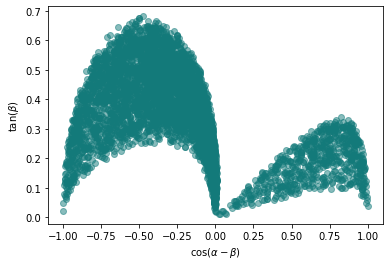

In [106]:
plot_df(data_rw['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

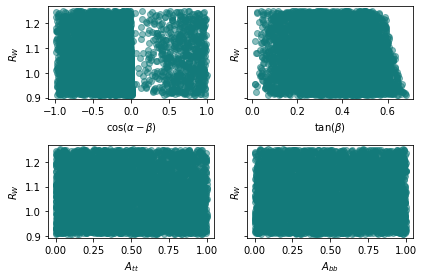

In [107]:
plot_tabledf(data_rw['1s'],Rw.latex_name,
             latex_names=latex_names)

### $$R_{Z}$$

In [108]:
data_rz = Rz.parameter_space_pandas([
         ghtt_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghbb_2hdm(np.arccos(Cab) + np.arctan(tb),Att,Cab,tb),
         ghzz_2hdm(np.sqrt(1-Cab**2))
],parameters)

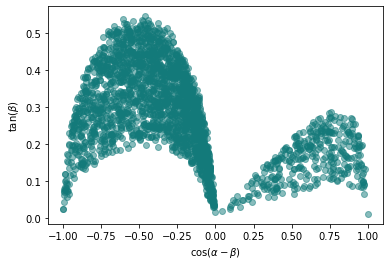

In [109]:
plot_df(data_rz['1s'],colx='Cab',coly='tb',
        latex_names=latex_names)

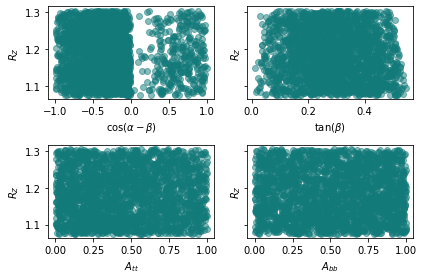

In [110]:
plot_tabledf(data_rz['1s'],Rz.latex_name,
             latex_names=latex_names)

Using directly matplotlib

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

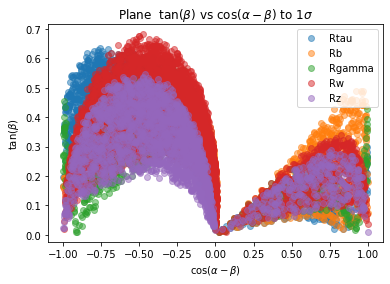

In [112]:
data1s = {'Rtau':data_rtau['1s'],'Rb':data_rb['1s'],'Rgamma':data_rga['1s'],
          'Rw':data_rw['1s'],'Rz':data_rz['1s']}
plt.figure()
for k in data1s.keys():
    plt.plot(data1s[k]['Cab'],data1s[k]['tb'],'o',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\alpha -\beta)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$ to 1$\sigma$')
plt.legend();